<a href="https://colab.research.google.com/github/cing1/Diagram-de-interaccion-de-columnas/blob/main/DIAGRAMA_DE_INTERACCION_DE_COLUMNAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DIAGRAMA DE INTERACION DE COLUMNAS**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [ ]:
Asu=[[6,8,10,12,16,20,25],
     [0.28,0.5,0.79,1.13,2.01,3.14,4.91]]
Asn=[]

# Parámetros de la columna
b = 30 #base de la columna
h = 30 #altura de la columna
rec = 3 #recubrimiento
d_ac = 12 #diatro de acero de refuerzo
d_ac_est=10

d_ac=d_ac/10
d_ac_est=d_ac_est/10

n_filas=4 #candidad de filas de acero
n_ac_filas=[5,2,2,5] #cantidad de aceros en cada fila
d_ac_filas=[12,12,12,12] #diametro de aceros en cada fila

for i in range(len(n_ac_filas)):
  for j in range(len(Asu[0])):
    if d_ac_filas[i]==Asu[0][j]:
      Asn.append(n_ac_filas[i]*Asu[1][j])

In [ ]:
#PROPIEDADES DE LOS MATERIALES
fc=21 #[MPa]
fy=420 #[MPa]
E=200000 #[MPa]
Ey=fy/E

espaciamiento vertical=6.93
espaciamiento horizontal 1 = 5.2cm
espaciamiento horizontal 2 = 20.8cm
espaciamiento horizontal 3 = 20.8cm
espaciamiento horizontal 4 = 5.2cm


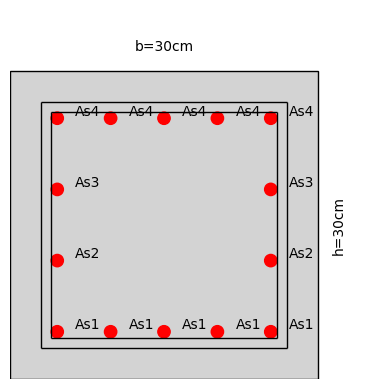

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def dibujar_columna(b, h, rec, d_ac,d_ac_est):
    # Crear una figura y un eje
    fig, ax = plt.subplots()
    # Dibujar la columna
    columna = patches.Rectangle((0, 0), b, h, linewidth=1, edgecolor='k', facecolor='lightgray')
    ax.add_patch(columna)
    esp_filas = 0
    esp_col=0
    y0_ac=rec+d_ac_est+(d_ac/2)
    x0_ac=rec+d_ac_est+(d_ac/2)
    esp_filas = ( h-2*rec-2*d_ac_est-d_ac )/(n_filas-1)
    print('espaciamiento vertical=' + str(round(esp_filas,2)))
    # Dibujar los aceros de refuerzo en la parte superior
    for i in range(n_filas):
      y_ac=y0_ac+i*esp_filas
      esp_col=( b-2*rec-2*d_ac_est-d_ac )/(n_ac_filas[i]-1)
      print('espaciamiento horizontal ' + str(i+1) + " = " + str(round(esp_col,2)) + 'cm')

      for j in range(n_ac_filas[i]):
        x = x0_ac+j * esp_col
        acero_superior = patches.Circle((x, y_ac), d_ac / 2, color='red')
        ax.add_patch(acero_superior)
        ax.annotate(f'As{str(i + 1)}', (x + rec, y_ac), color='black', fontsize=10, ha='center', va='bottom')
    # Líneas segmentadas para el recubrimiento
    ax.hlines(y=rec, xmin=rec, xmax=b-rec, color='k', linestyle='solid', linewidth=1)
    ax.hlines(y=h-rec, xmin=rec, xmax=b-rec, color='k', linestyle='solid', linewidth=1)
    ax.vlines(x=rec, ymin=rec, ymax=h-rec, color='k', linestyle='solid', linewidth=1)
    ax.vlines(x=b-rec, ymin=rec, ymax=h-rec, color='k', linestyle='solid', linewidth=1)

    ax.hlines(y=rec+d_ac_est, xmin=rec+d_ac_est, xmax=b-rec-d_ac_est, color='k', linestyle='solid', linewidth=1)
    ax.hlines(y=h-rec-d_ac_est, xmin=rec+d_ac_est, xmax=b-rec-d_ac_est, color='k', linestyle='solid', linewidth=1)
    ax.vlines(x=rec+d_ac_est, ymin=rec+d_ac_est, ymax=h-rec-d_ac_est, color='k', linestyle='solid', linewidth=1)
    ax.vlines(x=b-rec-d_ac_est, ymin=rec+d_ac_est, ymax=h-rec-d_ac_est, color='k', linestyle='solid', linewidth=1)

    # Etiquetas de dimensiones
    ax.annotate('b=' + str(b) + 'cm', (b / 2, h+2), color='black', fontsize=10, ha='center')
    ax.annotate('h=' + str(h) + 'cm', (b + 2, h / 2), color='black', fontsize=10, va='center', ha='center', rotation='vertical')

    # Ajustar los límites del gráfico
    ax.set_xlim(0, b + 2 * rec)
    ax.set_ylim(0, h + 2 * rec)

    # Mostrar el gráfico
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis('off')
    plt.show()
# Dibujar la columna con las cotas y rec con líneas segmentadas
dibujar_columna(b, h, rec, d_ac,d_ac_est)



In [ ]:
#FORMULAS
Pn=0.80(0.85*fc*(Ag-As1)+fy*As1)